<a href="https://colab.research.google.com/github/sunand-kumar/new/blob/master/mnist_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
single_image.shape

(28, 28)

In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

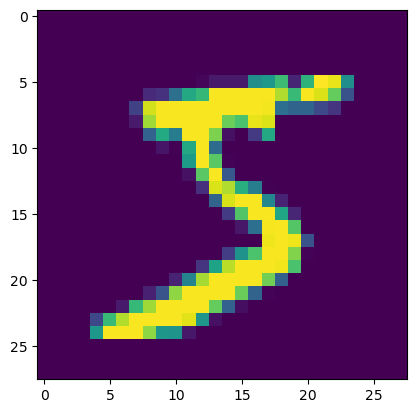

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
y_test.shape

(10000,)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_train.shape

(60000, 10)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
#Normalize the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0].max()

1.0

In [ ]:
x_train[0].min()

0.0

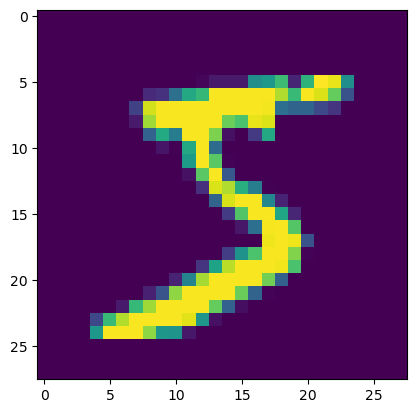

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [ ]:
#Train the model
model.fit(x_train, y_cat_train, epochs = 10, validation_data=(x_test, y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1427 - accuracy: 0.9571 - val_loss: 0.0607 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0499 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0401 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0416 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0342 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.0432 - val_accuracy:

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.142688,0.957133,0.060733,0.9806
1,0.046613,0.985450,0.049908,0.9838
2,0.029600,0.990533,0.040051,0.9863
3,0.020022,0.993783,0.041561,0.9856
4,0.014915,0.995083,0.034212,0.9891
5,0.009962,0.996933,0.041069,0.9877
6,0.007538,0.997383,0.043175,0.9876


<Axes: >

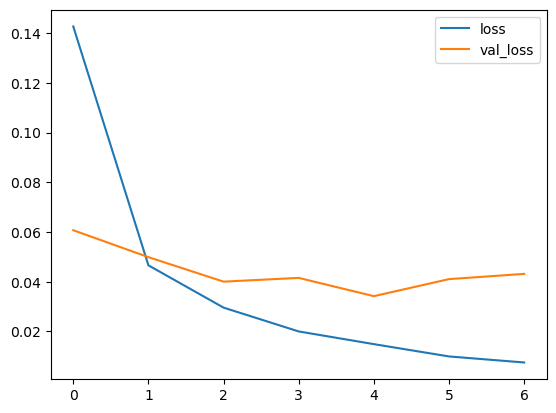

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

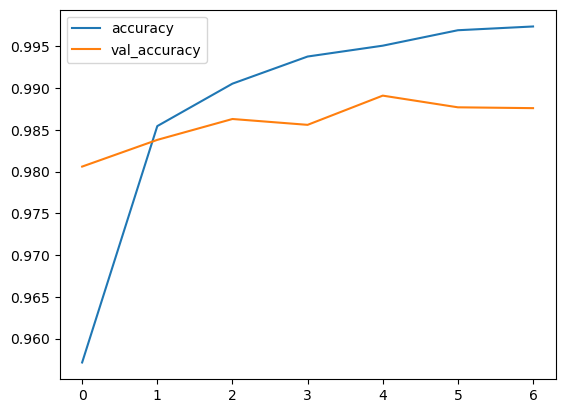

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9876


[0.04317466914653778, 0.9876000285148621]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_test_pred = model.predict(x_test)

313/313 [==============================] - 0s 841us/step


In [ ]:
y_test_pred.shape

(10000, 10)

In [ ]:
y_test_pred[0]

array([1.2250516e-13, 1.8890477e-10, 2.1251897e-10, 1.0303149e-09,
       1.6039456e-09, 1.4105717e-13, 3.2590024e-19, 1.0000000e+00,
       2.3006452e-10, 1.5705252e-08], dtype=float32)

In [ ]:
y_test_pred_classes = np.argmax(y_test_pred,axis = 1)

In [ ]:
y_test_pred_classes.shape

(10000,)

In [ ]:
y_test_pred_classes[0]

7

In [ ]:
print(classification_report(y_test,y_test_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test, y_test_pred_classes)

array([[ 977,    0,    1,    1,    0,    0,    0,    0,    1,    0],
       [   0, 1133,    0,    0,    0,    0,    1,    0,    1,    0],
       [   1,    1, 1021,    0,    0,    0,    2,    6,    1,    0],
       [   0,    1,    1, 1001,    0,    5,    0,    0,    1,    1],
       [   0,    2,    0,    0,  962,    0,    6,    0,    0,   12],
       [   1,    0,    1,    6,    0,  879,    3,    0,    1,    1],
       [  10,    2,    0,    0,    2,    4,  938,    0,    2,    0],
       [   1,    5,    4,    0,    0,    0,    0, 1011,    1,    6],
       [   4,    2,    3,    1,    1,    1,    0,    2,  954,    6],
       [   2,    1,    0,    3,    2,    0,    0,    0,    1, 1000]])

In [ ]:
y_train_pred = model.predict(x_train)

1875/1875 [==============================] - 2s 810us/step


In [ ]:
y_train_pred.shape

(60000, 10)

In [ ]:
y_train_pred[0]

array([7.3219547e-14, 1.8391910e-10, 7.6630065e-13, 1.9766429e-02,
       2.0328476e-12, 9.8023349e-01, 3.5701517e-14, 5.7379202e-11,
       3.9382790e-09, 1.2478050e-07], dtype=float32)

In [ ]:
y_train_pred_classes = np.argmax(y_train_pred,axis = 1)

In [ ]:
y_train_pred_classes.shape

(60000,)

In [ ]:
y_train_pred_classes[0]

5

In [ ]:
print(classification_report(y_train,y_train_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
confusion_matrix(y_train,y_train_pred_classes)

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6741,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    1, 5957,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0, 6118,    0,    5,    0,    0,    3,    4],
       [   0,    7,    0,    0, 5820,    0,    1,    0,    0,   14],
       [   0,    1,    0,    0,    0, 5409,    5,    0,    4,    2],
       [   5,    0,    0,    0,    0,    0, 5913,    0,    0,    0],
       [   0,   18,    0,    0,    3,    0,    0, 6237,    0,    7],
       [   2,    0,    1,    0,    0,    0,    0,    0, 5847,    1],
       [   0,    3,    0,    0,    0,    0,    0,    0,    0, 5946]])

In [ ]:
#predict for inference image
inference_image = x_test[234]

In [ ]:
print(inference_image.max(),inference_image.min())

1.0 0.0


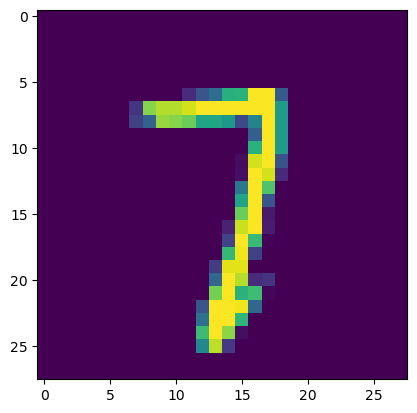

In [ ]:
plt.imshow(inference_image)

In [ ]:
inference_image.shape

(28, 28, 1)

In [ ]:
np.argmax(model.predict(inference_image.reshape(1,28,28,1)))

1/1 [==============================] - 0s 10ms/step


7